## Loading of the Tweets Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [3]:
tweet_data = pd.read_json('drive/My Drive/Colab Notebooks/DSSC_NLP/Project/tweets.json')
tweet_data.shape

(20000, 14)

In [ ]:
tweet_data.head(3)

,date,tweet_id,user_name,user_id,user_verified,user_location,n_retweet,n_likes,hashtags,text,replies,n_replies,text_cleaned,tweet_sentiment
0,2021-04-26 00:00:00+00:00,1386809816530702337,POTUS,1349149096909668363,True,,19325,151789,[],Remember: If you received either the Pfizer or...,[],0,"[rememb, receiv, pfizer, moderna, covid, vacci...",neu
1,2021-04-24 00:00:00+00:00,1385986330182574081,ryanaboyd,336962093,False,Los Angeles,9610,42334,[],The US government’s depraved policy of watchin...,[@ryanaboyd Stupid take in light of the last 2...,2,"[govern, deprav, polici, watch, pandem, burn, ...",neg
2,2021-04-25 00:00:00+00:00,1386395715442778114,GalvinAlmanza,1087717031724625920,True,"New York, NY",6751,74479,[],Just read that a % of people are skipping 2nd ...,[@GalvinAlmanza Aside from injection sight sor...,17,"[read, peopl, skip, vaccin, fear, effect, read...",neu


## Evaluation Metrics for  Classification

Classifiers are evaluated according some metrics as for example: precision, recall, F1_score, etc.. 
We have defined three methods to show some of these meaures, one to plot the confusion matrix, and other two for ROC and Precision-Recall Curve.

In [4]:
! pip install mlxtend

In [5]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def display_multi_confusion_matrix(y_target, y_predicted, image_name):

  cm = confusion_matrix(y_target=y_target, 
                        y_predicted=y_predicted, 
                        binary=False)

  np.seterr(divide='ignore', invalid='ignore') # to remove warnings

  fig, ax = plot_confusion_matrix(conf_mat=cm)

  if len(image_name) > 0:
    plt.savefig('{}.png'.format(image_name), bbox_inches='tight')

  plt.show()

In [6]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# It is a plot of the false positive rate (x-axis) versus the true positive rate 
# (y-axis) for a number of different candidate threshold values between 0.0 and 1.0. 
# Put another way, it plots the false alarm rate versus the hit rate.

def display_multi_roc_curve(y_test, y_score, n_classes, image_name):

  if y_test.ndim == 1: 
    y_test = label_binarize(y_test, classes=[0, 1, 2]) # transform y_test in matrix

  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes): # One Vs All
      fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i]) # for each class compute FPR and TPL
      roc_auc[i] = auc(fpr[i], tpr[i]) # area under the curve

  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])  

  # First aggregate all false positive rates
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

  # Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
      mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

  # Finally average it and compute AUC
  mean_tpr /= n_classes

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

  # Plot all ROC curves
  plt.figure()

  plt.plot(fpr["micro"], tpr["micro"],
          label='micro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["micro"]),
          color='deeppink', linestyle=':', linewidth=4)

  plt.plot(fpr["macro"], tpr["macro"],
          label='macro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["macro"]),
          color='navy', linestyle=':', linewidth=4)

  lw = 2
  colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
  for i, color in zip(range(n_classes), colors):
      plt.plot(fpr[i], tpr[i], color=color, lw=lw,
              label='ROC curve of class {0} (area = {1:0.2f})'
              ''.format(i, roc_auc[i]))

  plt.plot([0, 1], [0, 1], 'k--', lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve for multi-class')
  plt.legend(loc="lower right")

  if len(image_name) > 0:
    plt.savefig('{}.png'.format(image_name), bbox_inches='tight')

  plt.show()

In [73]:
from sklearn.metrics import precision_recall_curve

# Precision-Recall is a useful measure of success of prediction when the classes 
# are very imbalanced. In information retrieval, precision is a measure of result relevancy, 
# while recall is a measure of how many truly relevant results are returned.

# The precision-recall curve shows the tradeoff between precision and recall for 
# different threshold. A high area under the curve represents both high recall and 
# high precision, where high precision relates to a low false positive rate, and high 
# recall relates to a low false negative rate. High scores for both show that the classifier 
# is returning accurate results (high precision), as well as returning a majority 
# of all positive results (high recall).

def display_multi_prec_recall_curve(y_test, y_score, n_classes, image_name):

  if y_test.ndim == 1: 
    y_test = label_binarize(y_test, classes=[0, 1, 2])

  prec = dict()
  recall = dict()
  for i in range(n_classes): # One vs All
      prec[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])

  # First aggregate all false positive rates
  all_prec = np.unique(np.concatenate([prec[i] for i in range(n_classes)]))

  # Then interpolate all ROC curves at this points
  mean_recall = np.zeros_like(all_prec)
  for i in range(n_classes):
      mean_recall += np.interp(all_prec, prec[i], recall[i])

  # Finally average it and compute AUC
  mean_recall /= n_classes

  plt.figure()

  lw = 2
  colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
  for i, color in zip(range(n_classes), colors):
      plt.plot(recall[i], prec[i], color=color, lw=lw,
              label='PR-RC class {0}'''.format(i))
      
      no_skill = new_y.tolist().count(i) / len(new_y.tolist())
      plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color = color, lw = 4, 
               label='No Skill class {}'.format(i))

  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision Recall for multi-class')
  plt.legend(loc="lower right")

  if len(image_name) > 0:
    plt.savefig('{}.png'.format(image_name), bbox_inches='tight')

  plt.show()

Generally, the use of ROC curves and precision-recall curves are as follows:

- ROC curves should be used when there are roughly equal numbers of observations for each class.

- Precision-Recall curves should be used when there is a moderate to large class imbalance.

The reason for this recommendation is that ROC curves present an optimistic picture of the model on datasets with a class imbalance. 

## MultiClass Classification

Multiclass classification is a classification task with more than two classes: each sample can only be labeled as one class. That is exactly as in our case, since we have sentiment feature that can takes one of the three different values: positive, negative or neutral.

In the following subsection we are going to try some strategies: LogisticRegresssion, OnevsAll and OnevsOne.

Since the following models are built according a supervised learning approach, we could split the dataset in train and test sets.

In [18]:
from sklearn.model_selection import train_test_split
tweet_train, tweet_test, sentiment_train, sentiment_test = train_test_split(tweet_data.text_cleaned, tweet_data.tweet_sentiment, test_size = 0.3, random_state = 42)

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [20]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), 
                             min_df=0.001, 
                             max_df=0.75, 
                             stop_words='english')

labels2numbers = LabelEncoder()

X = vectorizer.fit_transform(tweet_train.astype(str))
y = labels2numbers.fit_transform(sentiment_train)

new_X = vectorizer.transform(tweet_test.astype(str))
new_y = labels2numbers.transform(sentiment_test)

### LogisticRegression

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
best_c = None
best_f1_score = 0.0

for c in [50, 20, 10, 1.0, 0.5, 0.1, 0.05, 0.01]:
    clf = LogisticRegression(C=c, n_jobs=-1) # here, c is the regularization param
    cv_reg = cross_val_score(clf, X, y=y, cv=5, n_jobs=-1, scoring="f1_micro").mean()

    print("5-CV on train at C={}: {}".format(c, cv_reg.mean()))
    print()

    if cv_reg > best_f1_score:
        best_f1_score = cv_reg
        best_c = c
        
print("best C parameter: {}".format(best_c))

5-CV on train at C=50: 0.6742142857142858

5-CV on train at C=20: 0.6791428571428572

5-CV on train at C=10: 0.6809285714285714

5-CV on train at C=1.0: 0.6882142857142857

5-CV on train at C=0.5: 0.6821428571428572

5-CV on train at C=0.1: 0.6411428571428571

5-CV on train at C=0.05: 0.6032142857142857

5-CV on train at C=0.01: 0.4655714285714286

best C parameter: 1.0


In [103]:
reg_clf = LogisticRegression(C=best_c, n_jobs=-1, class_weight='balanced')
reg_clf.fit(X, y)
reg_preds = reg_clf.predict(new_X)

print(classification_report(new_y, reg_preds))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68      1745
           1       0.74      0.66      0.69      2618
           2       0.66      0.76      0.71      1637

    accuracy                           0.69      6000
   macro avg       0.69      0.70      0.69      6000
weighted avg       0.70      0.69      0.69      6000



In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

best_k = None
best_f1_score = 0.0

for k in [500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]:
  selector = SelectKBest(chi2, k=k).fit(X, y) 
  X_sel = selector.transform(X)
  reg_clf = LogisticRegression(C=best_c, n_jobs=-1, class_weight='balanced')
  cv_reg = cross_val_score(reg_clf, X_sel, y=y, cv=5, n_jobs=-1, scoring="f1_micro").mean()

  print("5-CV on train at K={}: {}".format(k, cv_reg.mean()))
  print()

  if cv_reg > best_f1_score:
      best_f1_score = cv_reg
      best_k = k
        
print("best K parameter: {}".format(best_k))

5-CV on train at K=500: 0.6845714285714285

5-CV on train at K=550: 0.6860714285714286

5-CV on train at K=600: 0.6862857142857143

5-CV on train at K=650: 0.6861428571428572

5-CV on train at K=700: 0.6895714285714286

5-CV on train at K=750: 0.6914285714285715

5-CV on train at K=800: 0.6909285714285713

5-CV on train at K=850: 0.6932857142857143

5-CV on train at K=900: 0.6922142857142857

5-CV on train at K=950: 0.6939285714285715

5-CV on train at K=1000: 0.6937857142857143

best K parameter: 950


In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# we take the features more related with the output class
selector = SelectKBest(chi2, k=best_k).fit(X, y) 
X_sel = selector.transform(X)
new_X_sel = selector.transform(new_X)

In [17]:
sel_log_pred = reg_clf.fit(X_sel, y).predict(new_X_sel)
print(classification_report(new_y, sel_log_pred))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68      1745
           1       0.72      0.68      0.70      2618
           2       0.66      0.74      0.70      1637

    accuracy                           0.69      6000
   macro avg       0.69      0.70      0.69      6000
weighted avg       0.69      0.69      0.69      6000



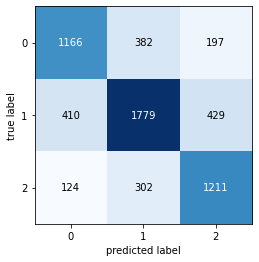

In [18]:
display_multi_confusion_matrix(new_y, sel_log_pred, 'logistic_confusion_1')

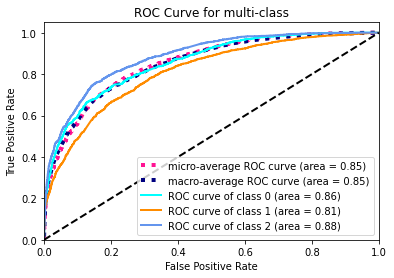

In [19]:
reg_clf_score = reg_clf.decision_function(new_X_sel) # decision functions are used to make decisions based on data
reg_n_classes = len(reg_clf.classes_)
display_multi_roc_curve(new_y, reg_clf_score, reg_n_classes, image_name='logistic_roc_1')

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[0 0 1]
 [0 0 1]
 [0 0 1]
 ...
 [0 1 0]
 [0 1 0]
 [0 1 0]]


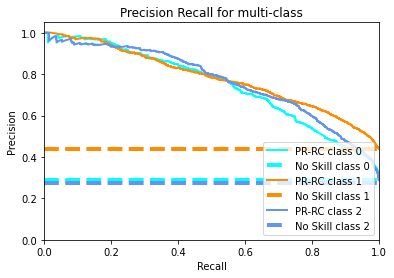

In [71]:
display_multi_prec_recall_curve(new_y, reg_clf_score, reg_n_classes, image_name = 'logistic_pr_1')

### One - vs - All

This strategy consists in fitting one classifier per class. For each classifier, the class is fitted against all the other classes.

In [74]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

In [75]:
one_all_classifier = OneVsRestClassifier(LinearSVC(random_state=0))
one_all_fitted_model = one_all_classifier.fit(X, y)
one_all_pred = one_all_classifier.predict(new_X)

In [76]:
print(classification_report(new_y, one_all_pred))

              precision    recall  f1-score   support

           0       0.71      0.64      0.67      1745
           1       0.69      0.75      0.72      2618
           2       0.70      0.67      0.69      1637

    accuracy                           0.70      6000
   macro avg       0.70      0.69      0.69      6000
weighted avg       0.70      0.70      0.70      6000



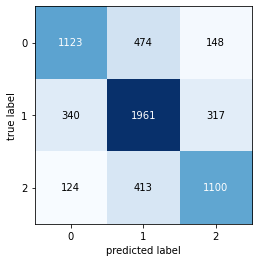

In [77]:
display_multi_confusion_matrix(new_y, one_all_pred, image_name='one_all_confusion')

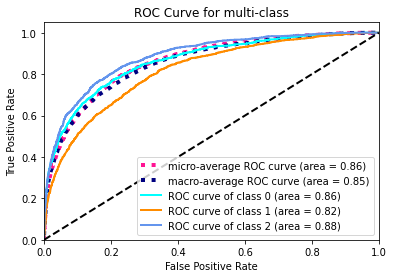

In [78]:
one_all_score = one_all_fitted_model.decision_function(new_X) # The confidence score for a sample is the signed distance of that sample to the hyperplane.
display_multi_roc_curve(new_y, one_all_score, one_all_fitted_model.n_classes_, image_name='one_all_roc')

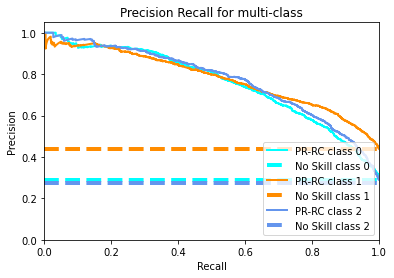

In [79]:
display_multi_prec_recall_curve(new_y, one_all_score, one_all_fitted_model.n_classes_, image_name = 'one_all_pr')

### One - vs - One



This strategy consists in fitting one classifier per class pair. At prediction time, the class which received the most votes is selected. Since it requires to fit n_classes * (n_classes - 1) / 2 classifiers, this method is usually slower than one-vs-the-rest, due to its O(n_classes^2) complexity.

In [80]:
from sklearn.multiclass import OneVsOneClassifier

In [81]:
one_one_classifier = OneVsOneClassifier(LinearSVC(random_state=0))
one_one_fitted_model = one_one_classifier.fit(X, y)
one_one_pred = one_one_classifier.predict(new_X)

In [82]:
print(classification_report(new_y, one_one_pred))

              precision    recall  f1-score   support

           0       0.71      0.64      0.67      1745
           1       0.69      0.75      0.72      2618
           2       0.70      0.67      0.68      1637

    accuracy                           0.70      6000
   macro avg       0.70      0.69      0.69      6000
weighted avg       0.70      0.70      0.69      6000



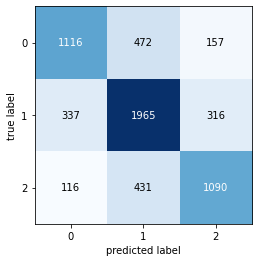

In [83]:
display_multi_confusion_matrix(new_y, one_one_pred, image_name = 'one_one_confusion')

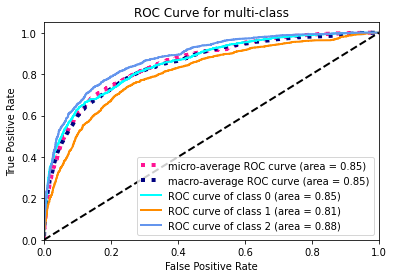

In [84]:
one_one_score = one_one_fitted_model.decision_function(new_X)
display_multi_roc_curve(new_y, one_one_score, one_one_fitted_model.n_classes_, image_name = 'one_one_roc')

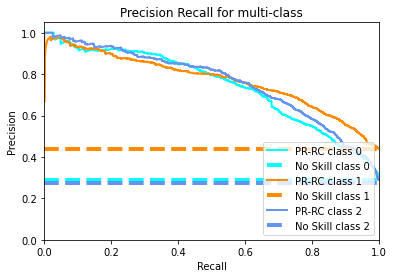

In [85]:
display_multi_prec_recall_curve(new_y, one_one_score, one_one_fitted_model.n_classes_,  image_name='one_one_pr')

## NeuralNetwork Classification

In [86]:
tweet_train, tweet_test, sentiment_train, sentiment_test = train_test_split(tweet_data.text_cleaned, tweet_data.tweet_sentiment, test_size = 0.3, random_state = 42)
tweet_train, tweet_dev_test, sentiment_train, sentiment_dev_test =  train_test_split(tweet_train, sentiment_train, test_size = 0.25, random_state = 42)

In [87]:
# collect known word tokens and tags
wordset, labelset = set(), set()

# collect tags from all data, to prevent unseen labels
labelset.update(set(tweet_data.tweet_sentiment))

for words in tweet_train:
    wordset.update(set(words))

# map words and tags into ints
PAD = '-PAD-'
UNK = '-UNK-'
word2int = {word: i + 2 for i, word in enumerate(sorted(wordset))}
word2int[PAD] = 0  # special token for padding
word2int[UNK] = 1  # special token for unknown words
 
label2int = {label: i for i, label in enumerate(sorted(labelset))}
# to translate it back
int2label = {i:label for label, i in label2int.items()}


def convert2ints(instances):
    result = []
    for words in instances:
        # replace words with int, 1 for unknown words
        word_ints = [word2int.get(word, 1) for word in words]
        result.append(word_ints)
    return result

In [88]:
# convert train data
tweet_train_int = convert2ints(tweet_train)
sentiment_train_int = [label2int[label] for label in sentiment_train]

# convert test data 
tweet_test_int = convert2ints(tweet_test)
sentiment_test_int = [label2int[label] for label in sentiment_test]

# convert dev data
tweet_dev_test_int = convert2ints(tweet_dev_test)
sentiment_dev_test_int = [label2int[label] for label in sentiment_dev_test]

In [89]:
from keras.utils import to_categorical

sentiment_train_1hot = to_categorical(sentiment_train_int, len(label2int))
sentiment_test_1hot = to_categorical(sentiment_test_int, len(label2int))
sentiment_dev_test_1hot = to_categorical(sentiment_dev_test_int, len(label2int))

In [90]:
# compute 95th percentile of training sentence lengths
L = sorted(map(len, tweet_train))
MAX_LENGTH = L[int(len(L)*0.95)]
print(MAX_LENGTH)

# apply padding
from keras.preprocessing.sequence import pad_sequences
tweet_train_int = pad_sequences(tweet_train_int, padding='post', maxlen=MAX_LENGTH)
tweet_test_int = pad_sequences(tweet_test_int, padding='post', maxlen=MAX_LENGTH)
tweet_dev_test_int = pad_sequences(tweet_dev_test_int, padding='post', maxlen=MAX_LENGTH)

24


In [92]:
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers import GlobalMaxPooling1D, Dropout
from keras.layers.core import Dense, Activation, Flatten
import numpy as np

np.random.seed(42)

# set parameters of matrices and convolution
embedding_dim = 64
nb_filter = 64
filter_length = 3
hidden_dims = 32
stride_length = 1

inputs = Input((MAX_LENGTH, ), 
               name='word_IDs')

embeddings = Embedding(len(word2int), 
                       embedding_dim, 
                       input_length=MAX_LENGTH)

convolution = Conv1D(filters=nb_filter,  # Number of filters to use
                    kernel_size=filter_length, # n-gram range of each filter.
                    padding='same',  #valid: don't go off edge; same: use padding before applying filter
                    activation='relu',
                    strides=stride_length)

model = Sequential()
model.add(embeddings)
model.add(convolution)
model.add(Activation(activation='tanh'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.2))
model.add(Dense(hidden_dims, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(label2int), activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 24, 64)            607680    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 24, 64)            12352     
_________________________________________________________________
activation_1 (Activation)    (None, 24, 64)            0         
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)               

In [93]:
from sklearn.utils import class_weight

# since the (sentiment) dataset is quite unbalanced towards one specific sentiment
# we could define a set of weights for the classes 'neg', 'neu', 'pos'.
# in this way we are forcing the model to have more attention on the less frequent classes

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(sentiment_train_int),
                                                 sentiment_train_int)

class_weights = {idx : class_weights[idx] for idx in range(len(class_weights))}

In [94]:
# batch size can have a huge effect on performance!
batch_size = 64
epochs = 30

history = model.fit(tweet_train_int, sentiment_train_1hot,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(tweet_dev_test_int, sentiment_dev_test_1hot),
                    class_weight=class_weights
                   )

loss, accuracy = model.evaluate(tweet_test_int, sentiment_test_1hot,
                                batch_size=batch_size,
                                verbose=False)

print("\nTesting Accuracy:  {:.4f}".format(accuracy))

Epoch 1/30
165/165 [==============================] - 4s 19ms/step - loss: 1.0594 - accuracy: 0.4073 - val_loss: 0.8085 - val_accuracy: 0.6440
Epoch 2/30
165/165 [==============================] - 3s 16ms/step - loss: 0.6767 - accuracy: 0.7147 - val_loss: 0.7175 - val_accuracy: 0.6860
Epoch 3/30
165/165 [==============================] - 3s 15ms/step - loss: 0.4402 - accuracy: 0.8349 - val_loss: 0.7322 - val_accuracy: 0.6946
Epoch 4/30
165/165 [==============================] - 3s 16ms/step - loss: 0.3069 - accuracy: 0.8890 - val_loss: 0.7911 - val_accuracy: 0.6957
Epoch 5/30
165/165 [==============================] - 3s 16ms/step - loss: 0.2298 - accuracy: 0.9173 - val_loss: 0.8741 - val_accuracy: 0.6957
Epoch 6/30
165/165 [==============================] - 3s 16ms/step - loss: 0.1643 - accuracy: 0.9442 - val_loss: 0.9461 - val_accuracy: 0.6897
Epoch 7/30
165/165 [==============================] - 3s 16ms/step - loss: 0.1417 - accuracy: 0.9508 - val_loss: 1.0925 - val_accuracy: 0.6789

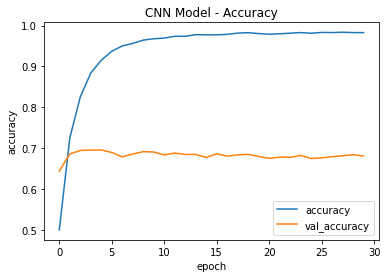

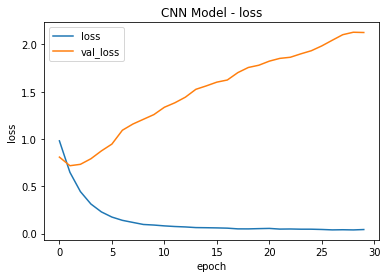

In [97]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('CNN Model - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy','val_accuracy'], loc = 'best')

image_name = 'cnn_accuracy'

if len(image_name) > 0:
  plt.savefig('{}.png'.format(image_name), bbox_inches='tight')

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('CNN Model - loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'], loc = 'best')

image_name = 'cnn_loss'

if len(image_name) > 0:
  plt.savefig('{}.png'.format(image_name), bbox_inches='tight')

plt.show()

In [98]:
cnn_pred = np.argmax(model.predict(tweet_test_int), axis = -1)
print(classification_report(sentiment_test_int, cnn_pred))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68      1745
           1       0.71      0.65      0.68      2618
           2       0.64      0.69      0.66      1637

    accuracy                           0.67      6000
   macro avg       0.67      0.68      0.67      6000
weighted avg       0.68      0.67      0.67      6000



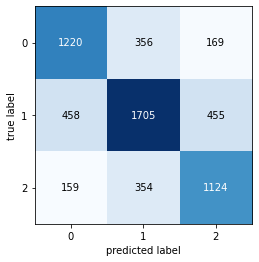

In [99]:
display_multi_confusion_matrix(sentiment_test_int, cnn_pred, image_name='cnn_confusion')

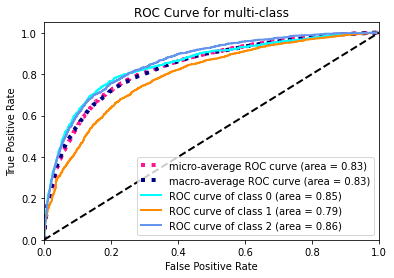

In [100]:
cnn_probs = model.predict(tweet_test_int)
cnn_n_classes = len(label2int)
display_multi_roc_curve(np.array(sentiment_test_int), cnn_probs, cnn_n_classes, image_name = 'cnn_roc')

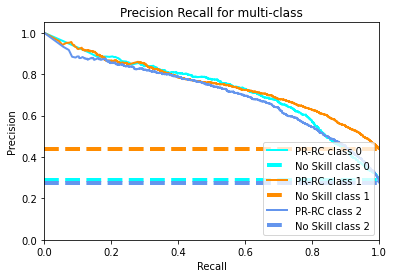

In [101]:
display_multi_prec_recall_curve(np.array(sentiment_test_int), cnn_probs, cnn_n_classes, image_name='cnn_pr')

## Baselines

In [102]:
from sklearn.dummy import DummyClassifier

most_frequent = DummyClassifier(strategy='most_frequent')
print(cross_val_score(most_frequent, X, y=y, cv=5, n_jobs=-1, scoring="f1_micro").mean())

0.4364285714285715


## References

- [scikit-learn: LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)

- [scikit-learn: MultiClass Classification](https://scikit-learn.org/stable/modules/multiclass.html)

- [scikit-learn: OnevsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier)

- [scikit-learn: OnevsOneClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html#sklearn.multiclass.OneVsOneClassifier)

- [mlxtend: multiclass confusion matrix](http://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix/)

- [scikit-learn: multiclass ROC Curve (1)](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#:~:text=In%20order%20to%20extend%20ROC,prediction%20(micro%2Daveraging).)

- [scikit-learn: multiclass ROC Curve (2)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

- [TensorFlow: Model](https://www.tensorflow.org/api_docs/python/tf/keras/Model)